# Test on point source

- unCLEANed image

In [1]:
import basc

import astropy
from astropy.table import Table
from astropy.io import fits

# silent Warning, when open image using aplpy
import warnings
from astropy.utils.exceptions import AstropyWarning 
warnings.simplefilter('ignore', category=AstropyWarning)

import matplotlib
import matplotlib.pyplot as plt

import aplpy

basc.readConfig("config.txt")

%matplotlib inline

/scratch/home/rwibowo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
# Generate a view objecct to work with
newView = basc.view()

In [3]:
image_file = 'uid___A002_Xbd203b_X1d77.ms.split.cal-CALIBRATE_PHASE-J1150+2417.ms.self3.cont.iter0.image.fits'
psf_file   = 'uid___A002_Xbd203b_X1d77.ms.split.cal-CALIBRATE_PHASE-J1150+2417.ms.self3.cont.iter0.psf.fits'
flux_file  = 'uid___A002_Xbd203b_X1d77.ms.split.cal-CALIBRATE_PHASE-J1150+2417.ms.self3.cont.iter0.flux.fits'

In [4]:
# Load in the fits files
newView.loadMap(image_file)
newView.loadBeam(psf_file)
newView.loadPBCor(flux_file)

In [5]:
# Run the MCMC process
newView.run()
result = newView.getChain()

In [6]:
print("Evidence: {}".format(newView.getEvidence()))
print("RMS residual: {}".format(newView.getRMS()))

result.write("chain.txt", format="ascii", overwrite=True)
print("Models written to chain.txt")

print("Sources detected:")
print(newView.clusters(eps=3)[0])

Evidence: 2361.206721588303
RMS residual: 0.00015859016504188292
Models written to chain.txt
Sources detected:
        x                  y         ...          dy                 F         
------------------ ----------------- ... ------------------- ------------------
50.520082303167634 50.58346528482313 ... 0.24762834524295999 0.4678487129219151


In [7]:
fits.info(image_file)

Filename: uid___A002_Xbd203b_X1d77.ms.split.cal-CALIBRATE_PHASE-J1150+2417.ms.self3.cont.iter0.image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     974   (200, 200, 1, 1)   float32   


In [8]:
image_data = fits.getdata(image_file)
psf_data = fits.getdata(psf_file)
flux_data = fits.getdata(flux_file)

In [9]:
image_data.shape

(1, 1, 200, 200)

In [10]:
image_data[0][0].shape

(200, 200)

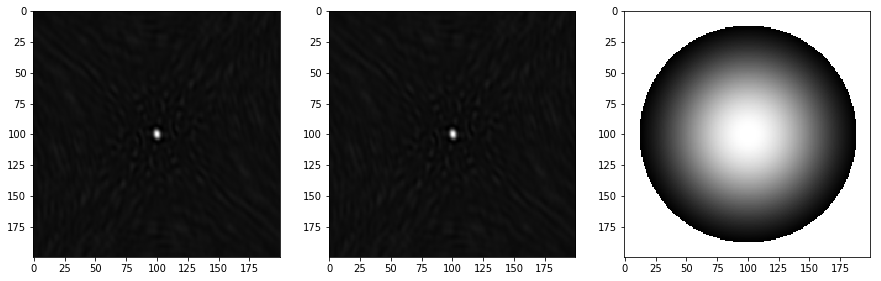

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(image_data[0][0], cmap='gray')

plt.subplot(132)
plt.imshow(psf_data[0][0], cmap='gray')

plt.subplot(133)
plt.imshow(flux_data[0][0], cmap='gray')

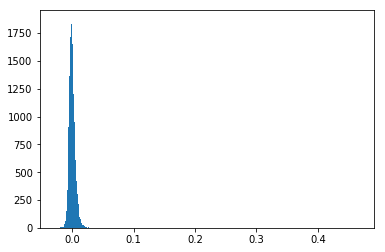

In [12]:
histogram = plt.hist(image_data[0][0].flatten(), 1000)

INFO: Setting slices=[0, 0] [aplpy.core]


INFO: Auto-setting vmin to -1.881e-02 [aplpy.core]
INFO: Auto-setting vmax to  2.493e-02 [aplpy.core]


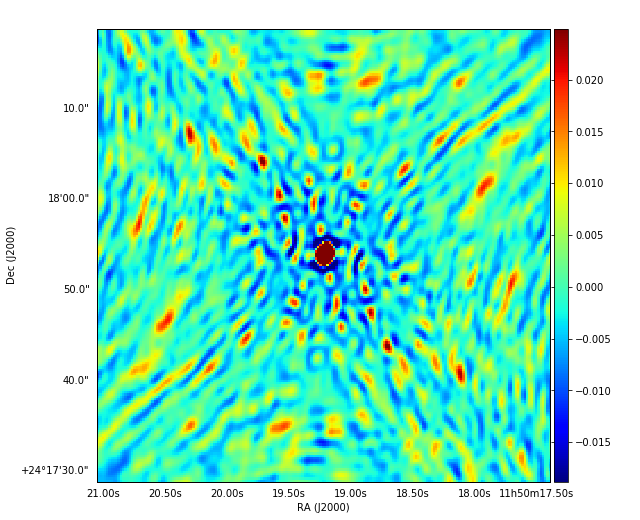

In [13]:
image = aplpy.FITSFigure(image_file)
image.show_colorscale()
image.show_colorbar()
#image.show_contour()

INFO: Setting slices=[0, 0] [aplpy.core]


INFO: Auto-setting vmin to -4.034e-02 [aplpy.core]
INFO: Auto-setting vmax to  5.382e-02 [aplpy.core]


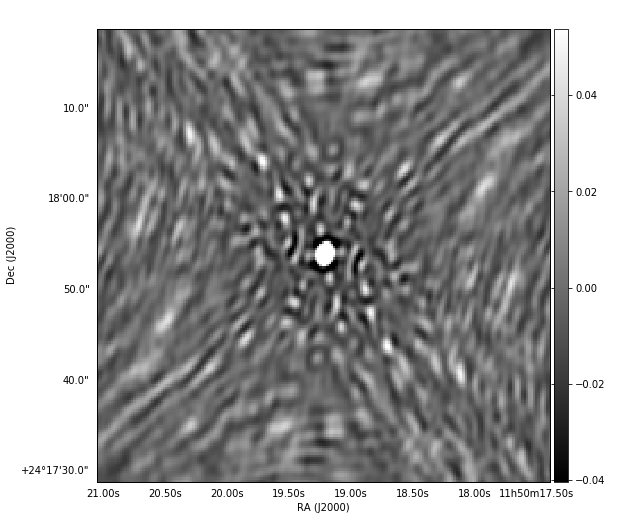

In [14]:
psf = aplpy.FITSFigure(psf_file)
psf.show_grayscale()
psf.show_colorbar()
#psf.show_contour()

In [15]:
newView.clusters()

(<Table length=1>
         x                  y         ...          dy                 F         
      float64            float64      ...       float64            float64      
 ------------------ ----------------- ... ------------------- ------------------
 50.520082303167634 50.58346528482313 ... 0.24762834524295999 0.4678487129219151,
 9)

In [16]:
result

x,y,F,k,L
float64,float64,float64,int64,float64
51.62509736837819,3.7546248990111053,0.005313422430631135,0,2762.8980594948234
50.948635779786855,50.407305697444826,0.4684121285268636,0,2762.8980594948234
53.43301697866991,55.89843309717253,0.0008524445192006959,0,2762.8980594948234
50.016817392315716,50.89490209938958,0.4686545682062289,1,2762.9723041868183
68.35670749424025,2.147769753355533,0.003130788923941463,2,2762.3674454726765
50.31342393485829,50.87103691184893,0.46049745005312787,2,2762.3674454726765
94.45653468137607,41.28906015539542,0.002380996191567277,3,2762.951633709042
50.05885831778869,50.461053813342005,0.4664238533049991,3,2762.951633709042
63.775202992837876,62.536807695869356,0.0031052263781610316,4,2761.4755349644365


In [17]:
newView.getRMS()

0.00015859016504188292

In [18]:
newView.getEvidence()

2361.206721588303

In [19]:
newView.resid

array([[ 6.33022245e-05,  8.53011059e-05,  1.22796252e-04, ...,
        -9.87745775e-05, -1.47879998e-04, -1.35022853e-04],
       [ 2.43932559e-05,  6.13713871e-05,  1.19962288e-04, ...,
        -1.38224693e-04, -1.58302706e-04, -1.19164023e-04],
       [-2.22091857e-05,  1.17857962e-05,  7.98600387e-05, ...,
        -1.56725424e-04, -1.56372547e-04, -9.88052394e-05],
       ...,
       [-3.26055627e-05, -9.41591308e-05, -6.17691028e-05, ...,
        -5.56192958e-05,  3.43354780e-05,  8.07796145e-05],
       [-3.99211558e-05, -8.37128674e-05, -5.48517420e-05, ...,
        -2.81444989e-05,  4.82951718e-05,  7.59789347e-05],
       [-3.81504816e-05, -6.03491976e-05, -3.02987184e-05, ...,
        -1.28179068e-05,  4.83217904e-05,  6.13243819e-05]])

In [20]:
newView.resid.shape

(100, 100)